In [1]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [2]:
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,22 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,29 days
H2O cluster name:,H2O_from_python_Admin_98iu7j
H2O cluster total nodes:,1
H2O cluster free memory:,6.351 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [3]:
data = h2o.import_file('http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip')
train, valid, test = data.split_frame([0.8, 0.1], seed = 69)
print('%d/%d/%d' % (train.nrows, valid.nrows, test.nrows))

Parse progress: |█████████████████████████████████████████████████████████| 100%
35255/4272/4451


In [4]:
y = 'IsArrDelayed'
ignored_fields = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                 'LateAircraftDelay', 'IsDepDelayed', 'IsArrDelayed', 'ActualElapsedTime', 'ArrTime']
x_all = [i for i in train.names if i not in ignored_fields]

In [5]:
m_def = H2ODeepLearningEstimator(model_id = 'm_def')
%time m_def.train(x_all, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 700 ms, sys: 448 ms, total: 1.15 s
Wall time: 1min 32s


In [6]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.12365430901548384
RMSE: 0.3516451464409595
LogLoss: 0.37597371656985434
Mean Per-Class Error: 0.1820453357118691
AUC: 0.9066794820533326
Gini: 0.8133589641066652
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.400171159929057: 


,NO,YES,Error,Rate
NO,1373.0,577.0,0.2959,(577.0/1950.0)
YES,252.0,2249.0,0.1008,(252.0/2501.0)
Total,1625.0,2826.0,0.1863,(829.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4001712,0.8443777,240.0
max f2,0.1247870,0.9068158,338.0
max f0point5,0.6657490,0.8585811,137.0
max accuracy,0.5078899,0.8209391,199.0
max precision,0.9999404,1.0,0.0
max recall,0.0083569,1.0,394.0
max specificity,0.9999404,1.0,0.0
max absolute_mcc,0.5078899,0.6361641,199.0
max min_per_class_accuracy,0.5375491,0.8148718,186.0
max mean_per_class_accuracy,0.5078899,0.8179547,199.0


Gains/Lift Table: Avg response rate: 56.19 %, avg score: 55.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0211188,1.0,1.7796881,1.7796881,1.0,1.0,1.0,1.0,0.0375850,0.0375850,77.9688125,77.9688125
,2,0.0301056,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0159936,0.0535786,77.9688125,77.9688125
,3,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0179928,0.0715714,77.9688125,77.9688125
,4,0.0501011,0.9999992,1.7796881,1.7796881,1.0,0.9999998,1.0,1.0000000,0.0175930,0.0891643,77.9688125,77.9688125
,5,0.1002022,0.9993701,1.7796881,1.7796881,1.0,0.9998482,1.0,0.9999241,0.0891643,0.1783287,77.9688125,77.9688125
,6,0.1500786,0.9926972,1.7796881,1.7796881,1.0,0.9969145,1.0,0.9989239,0.0887645,0.2670932,77.9688125,77.9688125
,7,0.2001797,0.9686431,1.7477655,1.7716985,0.9820628,0.9823859,0.9955107,0.9947848,0.0875650,0.3546581,74.7765468,77.1698504
,8,0.3001573,0.8639329,1.5917211,1.7117509,0.8943820,0.9198288,0.9618263,0.9698182,0.1591363,0.5137945,59.1721064,71.1750928
,9,0.4001348,0.7397762,1.4157519,1.6377927,0.7955056,0.8026263,0.9202695,0.9280436,0.1415434,0.6553379,41.5751901,63.7792721
,10,0.5001123,0.5881058,1.1877918,1.5478330,0.6674157,0.6638105,0.8697215,0.8752208,0.1187525,0.7740904,18.7791850,54.7832978


In [7]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1540138735224_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.10657512801554463
RMSE: 0.32645846292529257
LogLoss: 0.32941156269873406
Mean Per-Class Error: 0.15564202037272223
AUC: 0.9308790824520244
Gini: 0.8617581649040489
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5013013654167233: 


,NO,YES,Error,Rate
NO,3609.0,853.0,0.1912,(853.0/4462.0)
YES,725.0,4847.0,0.1301,(725.0/5572.0)
Total,4334.0,5700.0,0.1573,(1578.0/10034.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5013014,0.8600071,206.0
max f2,0.2575122,0.9159220,294.0
max f0point5,0.6957934,0.8827499,131.0
max accuracy,0.5056853,0.8430337,204.0
max precision,0.9924441,0.9987269,7.0
max recall,0.0105426,1.0,393.0
max specificity,0.9999508,0.9995518,0.0
max absolute_mcc,0.5640584,0.6852410,180.0
max min_per_class_accuracy,0.5447638,0.8409907,188.0
max mean_per_class_accuracy,0.5640584,0.8443580,180.0


Gains/Lift Table: Avg response rate: 55.53 %, avg score: 55.96 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0222244,1.0,1.8007897,1.8007897,1.0,1.0,1.0,1.0,0.0400215,0.0400215,80.0789663,80.0789663
,2,0.0299980,1.0000000,1.8007897,1.8007897,1.0,1.0000000,1.0,1.0000000,0.0139986,0.0540201,80.0789663,80.0789663
,3,0.0400638,1.0000000,1.8007897,1.8007897,1.0,1.0000000,1.0,1.0000000,0.0181263,0.0721464,80.0789663,80.0789663
,4,0.0500299,0.9999990,1.8007897,1.8007897,1.0,0.9999997,1.0,0.9999999,0.0179469,0.0900933,80.0789663,80.0789663
,5,0.1000598,0.9994410,1.7936152,1.7972024,0.9960159,0.9998688,0.9980080,0.9999344,0.0897344,0.1798277,79.3615202,79.7202432
,6,0.1499900,0.9933414,1.8007897,1.7983966,1.0,0.9973619,0.9986711,0.9990780,0.0899139,0.2697416,80.0789663,79.8396587
,7,0.2000199,0.9727113,1.7828535,1.7945089,0.9900398,0.9847276,0.9965122,0.9954886,0.0891960,0.3589375,78.2853511,79.4508882
,8,0.2999801,0.8781206,1.7235873,1.7708762,0.9571286,0.9304732,0.9833887,0.9738240,0.1722900,0.5312276,72.3587314,77.0876213
,9,0.4000399,0.7487600,1.5066368,1.7047834,0.8366534,0.8150472,0.9466866,0.9341100,0.1507538,0.6819813,50.6636770,70.4783437
,10,0.5,0.5959236,1.2262606,1.6091170,0.6809571,0.6706795,0.8935619,0.8814449,0.1225772,0.8045585,22.6260558,60.9117014




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.13178790932666662
RMSE: 0.36302604497014623
LogLoss: 0.40123040434831275
Mean Per-Class Error: 0.1944281572923816
AUC: 0.8958737854951477
Gini: 0.7917475709902955
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.431029218374553: 


,NO,YES,Error,Rate
NO,1385.0,548.0,0.2835,(548.0/1933.0)
YES,303.0,2036.0,0.1295,(303.0/2339.0)
Total,1688.0,2584.0,0.1992,(851.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4310292,0.8271379,225.0
max f2,0.1296860,0.8983794,335.0
max f0point5,0.6713092,0.8484848,134.0
max accuracy,0.4954409,0.8078184,200.0
max precision,0.9999370,1.0,0.0
max recall,0.0162528,1.0,386.0
max specificity,0.9999370,1.0,0.0
max absolute_mcc,0.4954409,0.6116325,200.0
max min_per_class_accuracy,0.5354367,0.8029072,184.0
max mean_per_class_accuracy,0.5063479,0.8055718,196.0


Gains/Lift Table: Avg response rate: 54.75 %, avg score: 55.11 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0203652,1.0,1.8264215,1.8264215,1.0,1.0,1.0,1.0,0.0371954,0.0371954,82.6421548,82.6421548
,2,0.0301966,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0179564,0.0551518,82.6421548,82.6421548
,3,0.0400281,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0179564,0.0731082,82.6421548,82.6421548
,4,0.0500936,0.9999996,1.8264215,1.8264215,1.0,0.9999999,1.0,1.0000000,0.0183839,0.0914921,82.6421548,82.6421548
,5,0.1001873,0.9995906,1.8264215,1.8264215,1.0,0.9999023,1.0,0.9999511,0.0914921,0.1829842,82.6421548,82.6421548
,6,0.1500468,0.9939823,1.8092720,1.8207229,0.9906103,0.9977003,0.9968799,0.9992032,0.0902095,0.2731937,80.9272050,82.0722884
,7,0.2001404,0.9711418,1.7581441,1.8050599,0.9626168,0.9845295,0.9883041,0.9955305,0.0880718,0.3612655,75.8144107,80.5059892
,8,0.3000936,0.8664126,1.6253869,1.7452156,0.8899297,0.9238222,0.9555382,0.9716464,0.1624626,0.5237281,62.5386857,74.5215597
,9,0.4000468,0.7202941,1.4115202,1.6618406,0.7728337,0.7968133,0.9098888,0.9279637,0.1410859,0.6648140,41.1520166,66.1840554
,10,0.5,0.5773721,1.0949975,1.5485250,0.5995316,0.6452478,0.8478464,0.8714470,0.1094485,0.7742625,9.4997462,54.8525011



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-10-21 18:19:13,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-10-21 18:19:16,8.449 sec,3715 obs/sec,0.3393845,1,11965.0,0.5571843,0.8839554,-0.2572024,0.7011299,1.8007897,0.3759219,0.5630347,0.9034866,-0.2795896,0.6894570,1.8264215,0.3860019
,2018-10-21 18:20:05,59.554 sec,5300 obs/sec,7.1098568,21,250658.0,0.3636254,0.4018743,0.4645536,0.8964170,1.8007897,0.2043054,0.3844692,0.4491722,0.4033446,0.8717515,1.8264215,0.2195693
,2018-10-21 18:20:32,1 min 25.234 sec,5296 obs/sec,10.1574812,30,358102.0,0.3264585,0.3294116,0.5684179,0.9308791,1.8007897,0.1572653,0.3630260,0.4012304,0.4680437,0.8958738,1.8264215,0.1992041


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
DepTime,1.0,1.0,0.0022472
CRSDepTime,0.7548530,0.7548530,0.0016963
CRSElapsedTime,0.5782045,0.5782045,0.0012994
TailNum.NA,0.4948094,0.4948094,0.0011119
AirTime,0.4922256,0.4922256,0.0011061
---,---,---,---
TailNum.N897AA,0.0951880,0.0951880,0.0002139
TailNum.N627DL,0.0938830,0.0938830,0.0002110
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


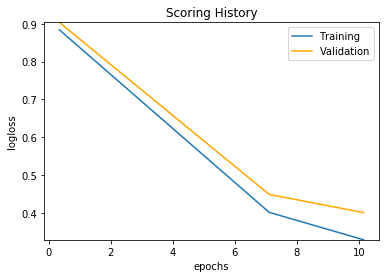

In [10]:
m_def.plot()

In [11]:
h2o.shutdown()

[WARNING] in <ipython-input-11-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_baa4 closed.
